In [101]:
# %%
from ast import GtE
from cmath import nan
from contextlib import nullcontext
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import scipy
from plotly.subplots import make_subplots
import math
import os

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# SVM 
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

from betacal import BetaCalibration


from sklearn.datasets import load_digits
from sklearn.manifold import Isomap, TSNE, LocallyLinearEmbedding, SpectralEmbedding


from sklearn.svm import SVC

import random

import datetime
from datetime import timedelta

In [102]:
# zipcode and county name
zip_and_county = pd.read_csv("/Users/Iris/CitadelWomenDatathon/green-spaces/relevant/us_cities_zips.csv")

In [103]:
# census block to county name
censusblock_county_df = pd.read_csv("/Users/Iris/CitadelWomenDatathon/census_code_mappers/us_blocks.csv")

In [104]:
# by census block
urban_tree_canopy_df = pd.read_csv("/Users/Iris/CitadelWomenDatathon/greenspace_data/urban_tree_canopy.csv")

In [105]:
urban_tree_canopy_df.head()

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group
0,"Memphis, TN--MS--AR",4.715701e+14,0.170732,0.276204,29.350,9249,1,4
1,"Memphis, TN--MS--AR",4.715701e+14,0.000000,0.276204,30.350,9249,1,4
2,"Memphis, TN--MS--AR",4.715701e+14,0.050112,0.276204,32.834,12071,1,4
3,"Memphis, TN--MS--AR",4.715701e+14,0.265038,0.276204,31.000,7721,1,4
4,"Memphis, TN--MS--AR",4.715701e+14,0.045038,0.276204,31.450,7721,1,4


In [106]:
len(urban_tree_canopy_df['census_block'].unique())

1938356

In [107]:
nyc_df = urban_tree_canopy_df.loc[urban_tree_canopy_df['city_name'] == 'New York--Newark, NY--NJ--CT']

In [108]:
(nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 1]['census_block']).unique

<bound method Series.unique of 1230124    3.608501e+14
1230125    3.401301e+14
1230126    3.401300e+14
1230127    3.401300e+14
1230128    3.604712e+14
               ...     
1378538    3.610320e+14
1378539    3.610320e+14
1378540    3.610320e+14
1378541    3.610320e+14
1378542    3.610320e+14
Name: census_block, Length: 56056, dtype: float64>

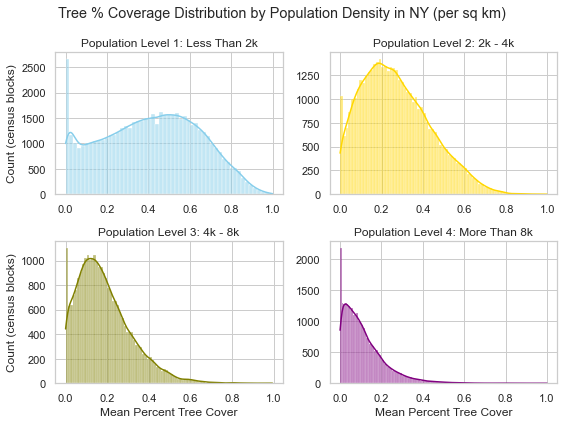

In [118]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 1], x="mean_percent_tree_cover", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].title.set_text('Population Level 1: Less Than 2k')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Count (census blocks)')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 2], x="mean_percent_tree_cover", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].title.set_text('Population Level 2: 2k - 4k')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 3], x="mean_percent_tree_cover", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].title.set_text('Population Level 3: 4k - 8k')
axs[1, 0].set_xlabel('Mean Percent Tree Cover')
axs[1, 0].set_ylabel('Count (census blocks)')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 4], x="mean_percent_tree_cover", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].title.set_text('Population Level 4: More Than 8k')
axs[1, 1].set_xlabel('Mean Percent Tree Cover')
axs[1, 1].set_ylabel('')
fig.suptitle('Tree % Coverage Distribution by Population Density in NY (per sq km)')
fig.tight_layout()

plt.savefig('/Users/Iris/CitadelWomenDatathon/green-spaces/figs/ny_pop_v_tree.pdf', format='pdf', facecolor='w', bbox_inches='tight')

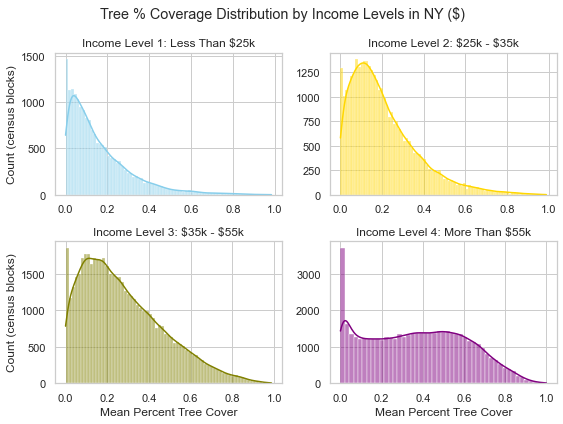

In [119]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 1], x="mean_percent_tree_cover", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].title.set_text('Income Level 1: Less Than \$25k')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Count (census blocks)')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 2], x="mean_percent_tree_cover", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].title.set_text('Income Level 2: \$25k - \$35k')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 3], x="mean_percent_tree_cover", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].title.set_text('Income Level 3: \$35k - \$55k')
axs[1, 0].set_xlabel('Mean Percent Tree Cover')
axs[1, 0].set_ylabel('Count (census blocks)')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 4], x="mean_percent_tree_cover", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].title.set_text('Income Level 4: More Than \$55k')
axs[1, 1].set_xlabel('Mean Percent Tree Cover')
axs[1, 1].set_ylabel('')

fig.suptitle('Tree % Coverage Distribution by Income Levels in NY (\$)')
fig.tight_layout()

plt.savefig('/Users/Iris/CitadelWomenDatathon/green-spaces/figs/ny_income_v_tree.pdf', format='pdf', facecolor='w', bbox_inches='tight')

In [33]:
urban_tree_canopy_df['pop_dens_group'].corr(urban_tree_canopy_df['mean_percent_tree_cover'])

-0.3954661781874581

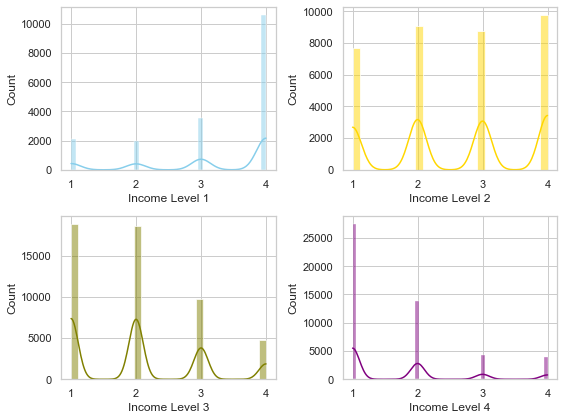

In [73]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 1], x="pop_dens_group", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].title.set_title('Income Level 1: Less Than $25k')
axs[0, 0].set_ylabel('sfasfdas')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 2], x="pop_dens_group", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].title.set_title('Income Level 2: $25k - $35k')
axs[0, 1].set_ylabel('asfadsasd')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 3], x="pop_dens_group", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].title.set_title('Income Level 3: $35k - $55k')
axs[1, 0].set_xlabel('soaijfdasd')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 4], x="pop_dens_group", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].title.set_title('Income Level 4: More Than $55k')
axs[1, 1].set_xlabel('afsdasfas')
fig.suptitle('Tree % Coverage Distribution Across Varying Income Levels')
fig.tight_layout()

In [11]:
censusblock_county_df

,state_fip,county_fip,county_name,tract_fip,block,tract_geoid,block_geoid
0,4,1,Apache County,942600,1000,4001942600,40019426001000
1,4,1,Apache County,942600,1001,4001942600,40019426001001
2,4,1,Apache County,942600,1002,4001942600,40019426001002
3,4,1,Apache County,942600,1003,4001942600,40019426001003
4,4,1,Apache County,942600,1004,4001942600,40019426001004
...,...,...,...,...,...,...,...
11158380,41,71,Yamhill County,31000,2138,41071031000,410710310002138
11158381,41,71,Yamhill County,31000,2139,41071031000,410710310002139
11158382,41,71,Yamhill County,31000,2140,41071031000,410710310002140
11158383,41,71,Yamhill County,31000,2141,41071031000,410710310002141


In [12]:
nyc_df

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group
1223436,"New York--Newark, NY--NJ--CT",3.604709e+14,0.030497,0.196316,30.425000,12800,1,3
1223437,"New York--Newark, NY--NJ--CT",3.401301e+14,0.104074,0.196316,31.654348,19968,1,3
1223438,"New York--Newark, NY--NJ--CT",3.403903e+14,0.294734,0.196316,29.812500,19968,1,3
1223439,"New York--Newark, NY--NJ--CT",3.608500e+14,0.419259,0.196316,28.116667,15361,1,3
1223440,"New York--Newark, NY--NJ--CT",3.604709e+14,0.053940,0.196316,29.905556,19201,1,3
...,...,...,...,...,...,...,...,...
1378538,"New York--Newark, NY--NJ--CT",3.610320e+14,0.374401,0.558636,26.368182,58897,4,1
1378539,"New York--Newark, NY--NJ--CT",3.610320e+14,0.019905,0.558636,23.787500,58897,4,1
1378540,"New York--Newark, NY--NJ--CT",3.610320e+14,0.052743,0.558636,24.057143,58897,4,1
1378541,"New York--Newark, NY--NJ--CT",3.610320e+14,0.467982,0.558636,24.526000,58897,4,1


In [15]:
censusblock_county_df.loc[censusblock_county_df['block_geoid'] == 1223436]

1223436

In [30]:
censusblock_county_df.loc[censusblock_county_df['block_geoid'] == int(list(nyc_df['census_block'].values)[0])]

,state_fip,county_fip,county_name,tract_fip,block,tract_geoid,block_geoid
5154301,36,47,Kings County,87800,2000,36047087800,360470878002000


In [ ]:
int(list(nyc_df['census_block'].values)[0])

In [25]:
int(list(nyc_df['census_block'].values)[0])

360470878002000

In [34]:
int(nyc_df['census_block'][1223436])

360470878002000.0

In [50]:
list(censusblock_county_df.loc[censusblock_county_df['block_geoid'] == int(nyc_df['census_block'][1223436])]['county_name'].values)[0]

'Kings County'

In [61]:
zipcodes = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010,
       10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10021,
       10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030,
       10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039,
       10040, 10044, 10065, 10069, 10075, 10128, 10280, 10282, 10301,
       10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310,
       10312, 10314, 10451, 10452, 10453, 10454, 10455, 10456, 10457,
       10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466,
       10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475,
       11004, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201,
       11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211,
       11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220,
       11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230,
       11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239,
       11354, 11355, 11356, 11357, 11358, 11360, 11361, 11362, 11363,
       11364, 11365, 11366, 11367, 11368, 11369, 11370, 11372, 11373,
       11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413,
       11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422,
       11423, 11426, 11427, 11428, 11429, 11432, 11433, 11434, 11435,
       11436, 11691, 11692, 11693, 11694, 11697]

In [55]:
zip_and_county

,zip_code,latitude_centroid,longitude_centroid,city,state_abbr,state_name,zcta,parent_zcta,population,density,county_fips,county_name,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1582.0,4.6,2198,Prince of Wales-Hyder,America/Metlakatla
33784,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,0.0,0.0,2198,Prince of Wales-Hyder,America/Sitka
33785,99929,56.36089,-132.00635,Wrangell,AK,Alaska,True,NaN,2509.0,0.4,2275,Wrangell,America/Sitka
33786,13021,42.91713,-76.55420,Auburn,NY,New York,True,NaN,37528.0,121.6,36011,Cayuga,America/New_York


In [68]:
list(zip_and_county.loc[zip_and_county['zip_code'] == 601]['county_name'].values)[0]

'Adjuntas'

In [72]:
census_block_idx = censusblock_county_df.loc[censusblock_county_df['county_name'] == 'Kings']
census_block_idx

,state_fip,county_fip,county_name,tract_fip,block,tract_geoid,block_geoid


In [85]:
block_nums = censusblock_county_df.loc[censusblock_county_df['county_name'] == 'Kings County']['block_geoid'].values

In [82]:
list(nyc_df.loc[int(nyc_df['census_block']) == block]['income_group'].values)[0]

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group,county_name
1223436,"New York--Newark, NY--NJ--CT",3.604709e+14,0.030497,0.196316,30.425000,12800,1,3,Kings County
1223437,"New York--Newark, NY--NJ--CT",3.401301e+14,0.104074,0.196316,31.654348,19968,1,3,Essex County
1223438,"New York--Newark, NY--NJ--CT",3.403903e+14,0.294734,0.196316,29.812500,19968,1,3,Union County
1223439,"New York--Newark, NY--NJ--CT",3.608500e+14,0.419259,0.196316,28.116667,15361,1,3,Richmond County
1223440,"New York--Newark, NY--NJ--CT",3.604709e+14,0.053940,0.196316,29.905556,19201,1,3,Kings County
...,...,...,...,...,...,...,...,...,...
1378538,"New York--Newark, NY--NJ--CT",3.610320e+14,0.374401,0.558636,26.368182,58897,4,1,
1378539,"New York--Newark, NY--NJ--CT",3.610320e+14,0.019905,0.558636,23.787500,58897,4,1,
1378540,"New York--Newark, NY--NJ--CT",3.610320e+14,0.052743,0.558636,24.057143,58897,4,1,
1378541,"New York--Newark, NY--NJ--CT",3.610320e+14,0.467982,0.558636,24.526000,58897,4,1,


In [97]:
n = 0
popval = 0
incomeval = 0
percent_tree = 0
for block in block_nums:
    block_data = list(nyc_df.loc[nyc_df['census_block'] == block]['income_group'].values)
    if len(block_data) != 0:
        incomeval += block_data[0]
        popval += list(nyc_df.loc[nyc_df['census_block'] == block]['pop_dens_group'].values)[0]
        percent_tree += list(nyc_df.loc[nyc_df['census_block'] == block]['mean_percent_tree_cover'].values)[0]
        n += 1

popval = popval / n
incomeval = incomeval / n
percent_tree = percent_tree / n

print(popval, incomeval, percent_tree)

3.72808671065033 2.1260603204524036 0.10954241295358147


In [98]:
df_income_pop_treecover = pd.DataFrame(index=zipcodes, columns=['income_lev', 'pop_lev', 'mean_tree_cover_percent'])

In [99]:
for zipcode in zipcodes:
    countynames = zip_and_county.loc[zip_and_county['zip_code'] == zipcode]['county_name'].values

    for countyname in countynames:
        countyname = countyname + ' County'

        block_nums = censusblock_county_df.loc[censusblock_county_df['county_name'] == countyname]['block_geoid'].values
        
        n = 0
        popval = 0
        incomeval = 0
        percent_tree = 0
        for block in block_nums:
            block_data = list(nyc_df.loc[nyc_df['census_block'] == block]['income_group'].values)
            if len(block_data) != 0:
                incomeval += block_data[0]
                popval += list(nyc_df.loc[nyc_df['census_block'] == block]['pop_dens_group'].values)[0]
                percent_tree += list(nyc_df.loc[nyc_df['census_block'] == block]['mean_percent_tree_cover'].values)[0]
                n += 1

        popval = popval / n
        incomeval = incomeval / n
        percent_tree = percent_tree / n

df_income_pop_treecover['income_lev'] = incomeval
df_income_pop_treecover['pop_lev'] = popval
df_income_pop_treecover['mean_tree_cover_percent'] = percent_tree


KeyboardInterrupt: 